Задача 7.1


In [4]:
%matplotlib inline

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sample = norm.rvs(size=100)

В случае неизвестного матожидания, сопряженным семейством распределений является нормальное, причем если параметры апроирного распределения равны (loc0, scale0), то параметры апостериорного равны ().

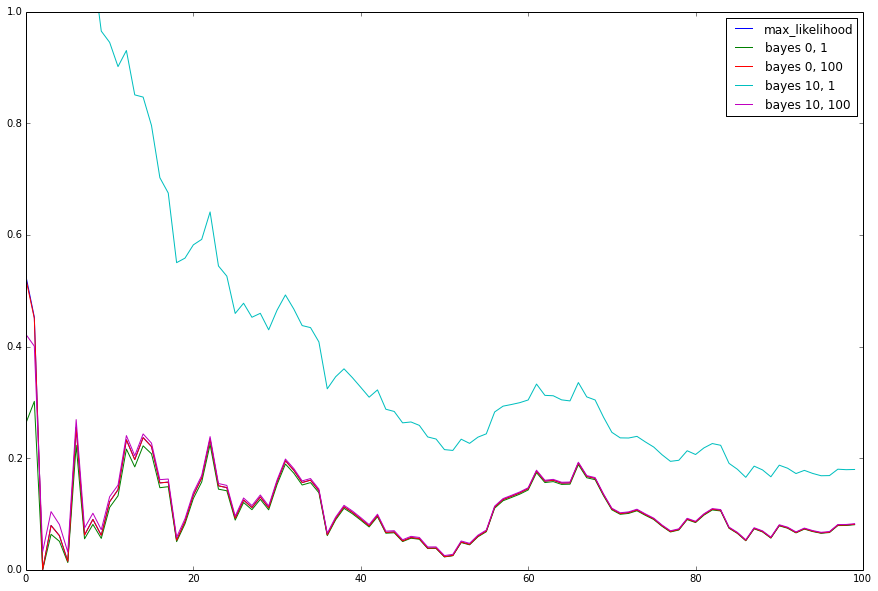

In [60]:
def max_likelihood_estimator_error(sample):
    return abs(np.mean(sample))

def bayes_estimator_error(loc0, scale0, sample):
    return abs((float(loc0) / scale0 + np.sum(sample))
               / (1.0 / scale0 + len(sample)))

def draw(errors):
    plt.figure(figsize=(15,10))
    plt.axis([0, errors.shape[0], 0, 1])

    labels = ["max_likelihood", "bayes 0, 1", "bayes 0, 100",
              "bayes 10, 1", "bayes 10, 100"]
    for i in range(errors.shape[1]):
        plt.plot(range(errors.shape[0]), errors[:, i], label=labels[i])

    plt.legend()
    plt.show()

errors = []
for length in range(1, len(sample) + 1):
    errors.append([
            max_likelihood_estimator_error(sample[:length]),
            bayes_estimator_error(0, 1, sample[:length]),
            bayes_estimator_error(0, 100, sample[:length]),
            bayes_estimator_error(10, 1, sample[:length]),
            bayes_estimator_error(10, 100, sample[:length]),
    ])
draw(np.array(errors))

Из графика видно, что кривая, соответствующая параметрам (10, 1) априорного распределения, оказалась хуже, что понятно, поскольку истинное значение матожидания равно 0.

В случае неизвестной дисперсии сопряженным является Scaled inverse chi-squared, причем если априорное имеет параметры (loc0, scale0), то параметры апостериорного равны ().

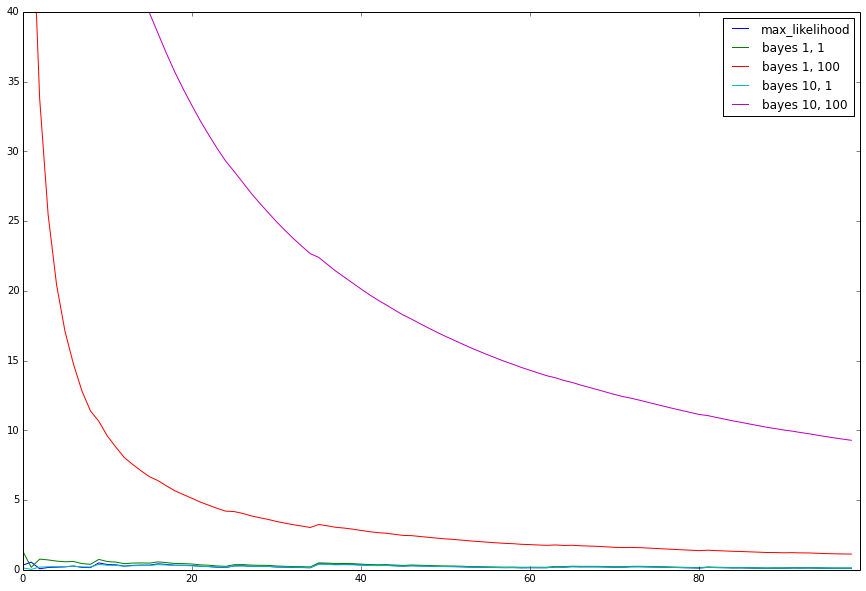

In [9]:
def error(x):
    return abs(1.0 - x)

def max_likelihood_estimator(sample):
    return np.sum([x * x for x in sample]) / len(sample)

def bayes_estimator(loc0, scale0, sample):
    loc1 = float(loc0) + len(sample)
    scale1 = (float(loc0) * scale0 + np.sum([x * x for x in sample])) / loc1
    return loc1 * scale1 / (loc1 - 2.0)

def draw(errors, y_lim=40):
    plt.figure(figsize=(15,10))
    plt.axis([0, errors.shape[0], 0, y_lim])

    labels = ["max_likelihood", "bayes 1, 1", "bayes 1, 100",
              "bayes 10, 1", "bayes 10, 100"]
    for i in range(errors.shape[1]):
        plt.plot(range(errors.shape[0]), errors[:, i], label=labels[i])

    plt.legend()
    plt.show()

errors = []
for length in range(2, len(sample) + 1):
    errors.append([
            error(max_likelihood_estimator(sample[:length])),
            error(bayes_estimator(1, 1, sample[:length])),
            error(bayes_estimator(1, 100, sample[:length])),
            error(bayes_estimator(10, 1, sample[:length])),
            error(bayes_estimator(10, 100, sample[:length])),
    ])
draw(np.array(errors))

Из графика видно, что кривая соответствующая параметрам (10, 100) априорного распределения оказалась хуже всех; несколько лучше -- (1, 100). Остальные кривые примерно одинаковы (увеличим масштаб графика, чтобы лучше это увидеть).

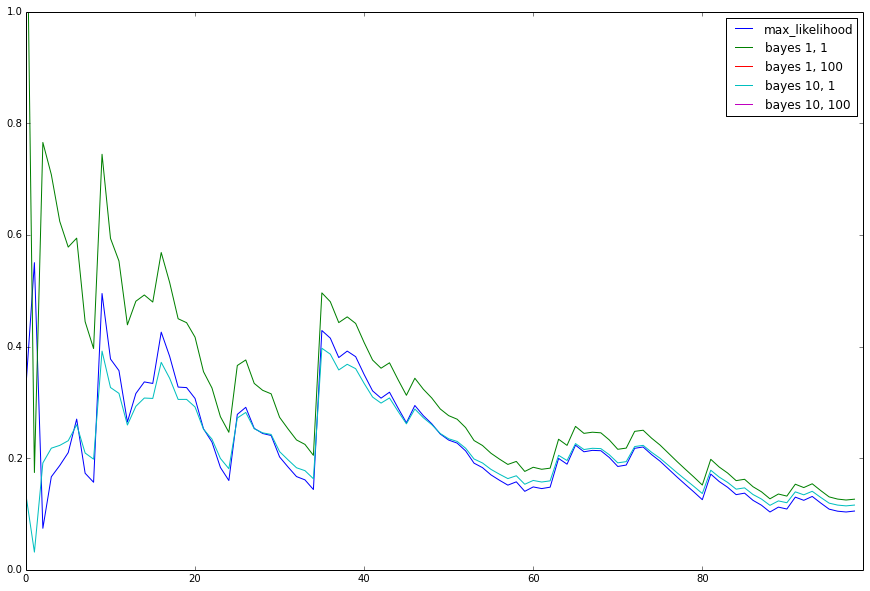

In [11]:
draw(np.array(errors), y_lim=1)